In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

## Теоретическая часть
пункт а) Этот процесс называется адаптация глаза. Основная мысль в том, что чувствительность глаза меняется в зависимости от освещения. Не буду копировать текст из википедии) но ссылку добавлю https://traditio.wiki/Адаптация_глаза

пункт б) мы наблюдаем систему линейных уравнений. Хочется однозначно переходить из (R, G, B) в (R_new, G_new, B_new). Для этого нужно потребовать, чтобы матрица, состоящая из коэффициентов a малых имела обратную, то есть ее определитель должен быть не равен нулю.

пункт б*) (R, G, B) лежат от 0 до 1-цы. Мы хотим, чтобы (R_new, G_new, B_new) тоже лежали бы от 0 до 1-цы. Так как (R, G, B) изначально лежат от 0 до 1-цы, то мы имеем не что иное, как квадрат в R^3. Нам дана система линейных уравнений, эта система переводит наш квадрат в нечто, линейным образом, то есть параллельные прямые останутся параллельными. Вот что может поменяться, так эта форма нашего нового тела. Но оно будет похоже на объемный паралеллограмм. По условию, мы хотим, чтобы этот новый паралеллограмм был тоже от 0 до 1-цы, то есть он должен быть внутри нашего старого тела, которое было квадратом. Иначе говоря, мы имеем следующее условие: нужно перебрать все вершины нашего старого тела, все 3-ки вершин(всего их 8 вариантов) и сказать, чтобы полученные выражения были бы > 0 и < 1.
То есть, ответ такой перебираем 8 вариантов вершин (0,0,0), (0,0,1), (0,1,0) ... (1,1,1) и подставляем каждую тройку в нашу систему:

* 0 < a_11 * 0 +a_12 * 0 + a_12 * 0 < 1
* 0 < a_21 * 0 +a_22 * 0 + a_22 * 0 < 1
* 0 < a_31 * 0 +a_32 * 0 + a_32 * 0 < 1


* 0 < a_11 * 0 +a_12 * 0 + a_12 * 1 < 1
* 0 < a_21 * 0 +a_22 * 0 + a_22 * 1 < 1
* 0 < a_31 * 0 +a_32 * 0 + a_32 * 1 < 1

и так далее. Ответом является 8 * 6 неравенств

пункт c: Для того, чтобы разобраться с этим пунктом будет полезно взглянуть на следующий график y = sin(x) и y = x

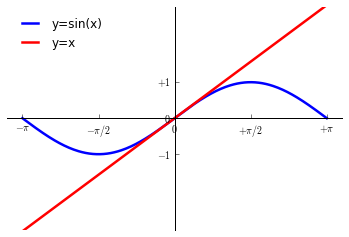

In [2]:
x = np.linspace(0,2,1000)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
S = np.sin(X)

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(S.min()*3.1, S.max()*3.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.plot(X, S, color="blue", linewidth=2.5, linestyle="-", label="y=sin(x)")
plt.plot(X, X, color="red", linewidth=2.5, linestyle="-", label="y=x")

plt.legend(loc='upper left', frameon=False)

На этом графике мы видим, что прямая y = x касается y = sin(x), она всегда выше sin. Это значит, что когда мы переведем все цветовые каналы в sin(), то их значения уменьшатся, то есть картинка потемнеет. Но это еще не все. Так же понятно, что разность между значениями цветовых каналов уменьшится, то есть, допустим у нас было красного = 1, а синего 1/2. Разница между ними была 1/2. Синус же от 1 равен 0.84, а sin(1/2) = 0.47. То есть разница уменьшилась до 0.37 => Аналогично со всеми значениями. Значит картинка станет "более серой".

### Практическая часть:
пункт a: Загрузите изображение Lena.jpg. Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения и со- храните в файл LenaMixed.jpg

In [3]:
#встроенная функция cv.imshow() у меня не работает, выдает странную ошибку, что, встречается часто и на разных ОС
def imshow(img_cv):
    b, g, r = cv.split(img_cv)
    img_plt = cv.merge((r, g, b)) 
    plt.imshow(img_plt)

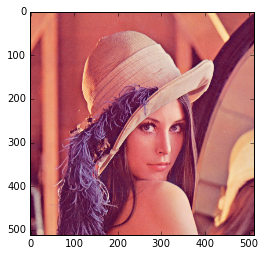

In [4]:
img_cv = cv.imread('lena.jpg')
imshow(img_cv)

In [5]:
def change_part_of_img(img_cv):
    s1, s2, s3 = img_cv.shape
    img = np.empty_like(img_cv)
    for i in np.arange(s1/2):
        for j in np.arange(s2/2):
            t = np.copy(img[i][j])
            img[i][j] = np.copy(img[i + s1/2][j + s2/2])
            img[i + s1/2][j + s2/2] = t
    return img

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


True

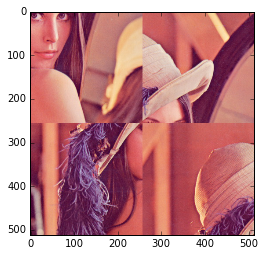

In [6]:
img_cv = cv.imread('lena.jpg')
img_change = change_part_of_img(img_cv)
imshow(img_change)
cv.imwrite('LenaMixed.jpg', img_change)

пункт b: Загрузите изображение Lena.jpg. Усредните значения всех трех цветовых каналов в каждый из каналов итогового изображения. Сохраните результат в файл LenaGrayMean.jpg

In [7]:
def img_to_gray(img_cv):
    s1, s2, s3 = img_cv.shape
    img = np.empty_like(img_cv)
    for i in np.arange(s1):
        for j in np.arange(s2):
            b, g, r = img_cv[i][j]
            img[i][j] = (int(r) + g + b) // 3
    return img

True

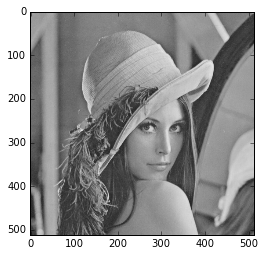

In [8]:
img_cv = cv.imread('lena.jpg')
img_gray = img_to_gray(img_cv)
imshow(img_gray)
cv.imwrite('LenaGrayMean.jpg', img_gray)

пункт c: Загрузите изображение Lena.jpg. Переведите исходное цветное изображение в изображение в градациях серого с помощью функции cvtColor. Загрузите с диска полученное в предыдущем задании изображение. Вычислите модуль разности между изображениями и отобразите ее на экране. Результат сохраните на диск в файл LenaMeanDifference.jpg

In [9]:
def get_mean_difference(img_gray_cv, img_gray):
    s1, s2, _ = img_gray.shape
    diff = np.empty_like(img_gray)
    for i in np.arange(s1):
        for j in np.arange(s2):
            g, _, _ = img_gray[i][j]
            t = int(img_gray_cv[i][j])
            diff[i][j] = abs(t - g)
    return diff

True

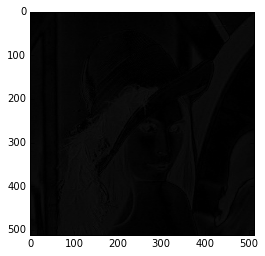

In [10]:
img_gray = img_to_gray(img_cv)
img_gray_cv = cv.cvtColor(img_cv, cv.COLOR_BGR2GRAY)
diff = get_mean_difference(img_gray_cv, img_gray)
imshow(diff)
cv.imwrite('LenaMeanDifference.jpg', diff)

пункт d: Загрузите изображение Lena.jpg. Переведите исходное изображение из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат и сохраните на диск с именем LenaMAXSV.jpg

True

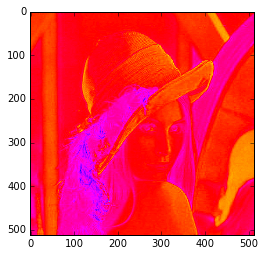

In [11]:
img_cv = cv.imread('lena.jpg')
img_hsv = cv.cvtColor(img_cv, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)
v[:][:] = 255
s[:][:] = 255
img_new = cv.merge((h, s, v))
img_max_sv = cv.cvtColor(img_new, cv.COLOR_HSV2BGR)
imshow(img_max_sv)
cv.imwrite('LenaMAXSV.jpg', img_max_sv)

пункт e: Загрузите изображение Lena.jpg. По цветному изображению на входе сгенерируйте и сохраните на диск 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения.

True

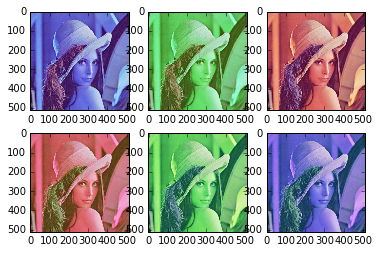

In [12]:
img_cv = cv.imread('lena.jpg')
b, g, r = cv.split(img_cv)

fig = plt.figure()
a=fig.add_subplot(2,3,1)
plt.imshow(cv.merge((b, g, r)))
a=fig.add_subplot(2,3,2)
plt.imshow(cv.merge((b, r, g)))
a=fig.add_subplot(2,3,3)
plt.imshow(cv.merge((r, g, b)))
a=fig.add_subplot(2,3,4)
plt.imshow(cv.merge((r, b, g)))
a=fig.add_subplot(2,3,5)
plt.imshow(cv.merge((g, r, b)))
a=fig.add_subplot(2,3,6)
plt.imshow(cv.merge((g, b, r)))

cv.imwrite('LenaRGB.jpg', cv.merge((b, g, r)))
cv.imwrite('LenaRBG.jpg', cv.merge((b, r, g)))
cv.imwrite('LenaBGR.jpg', cv.merge((r, g, b)))
cv.imwrite('LenaBRG.jpg', cv.merge((r, b, g)))
cv.imwrite('LenaGBR.jpg', cv.merge((g, r, b)))
cv.imwrite('LenaGRB.jpg', cv.merge((g, b, r)))

пункт f: Загрузите изображение Lena.jpg. Переведите его в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB и сохраните на диск.

True

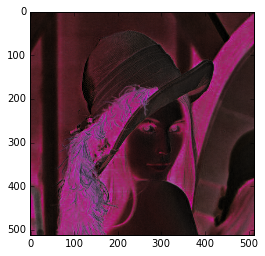

In [13]:
img_cv = cv.imread('lena.jpg')
img_hsv = cv.cvtColor(img_cv, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)
v[:][:] = 255 - v[:][:]
img_new = cv.merge((h, s, v))
img_invert_v = cv.cvtColor(img_new, cv.COLOR_HSV2BGR)
imshow(img_invert_v)
cv.imwrite('LenaInvertV.jpg', img_invert_v)

пункт g: Загрузите изображение Lena.jpg. Переведите его из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними.

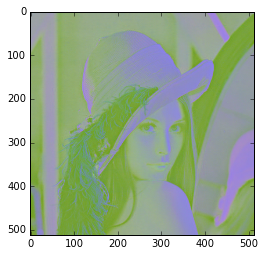

In [14]:
img_cv = cv.imread('lena.jpg')
img_cie_lab = cv.cvtColor(img_cv, cv.COLOR_BGR2Lab)
imshow(img_cie_lab)

In [15]:
def rgb2xyz(R, G, B):
    r = ( R / 255 )
    g = ( G / 255 )
    b = ( B / 255 )

    if (r > 0.04045):
        r = ( ( r + 0.055 ) / 1.055 ) ** 2.4
    else:
        r = r / 12.92
    if ( g > 0.04045 ):
        g = ( ( g + 0.055 ) / 1.055 ) ** 2.4
    else:
        g = g / 12.92
    if ( b > 0.04045 ):
        b = ( ( b + 0.055 ) / 1.055 ) ** 2.4
    else: b = b / 12.92

    r = (r * 100)
    g = (g * 100)
    b = (b * 100)

    X = (r * 0.4124 + g * 0.3576 + b * 0.1805)
    Y = (r * 0.2126 + g * 0.7152 + b * 0.0722)
    Z = (r * 0.0193 + g * 0.1192 + b * 0.9505)
    return X, Y ,Z
def xyz2lab(X, Y, Z):
    r_x =  95.047
    r_y = 100.000
    r_z = 108.883
    x = (X / r_x)
    y = (Y / r_y)
    z = (Z / r_z)

    if ( x > 0.008856 ):
        x = (x**( 1/3 ))
    else: x = (( 7.787 * x ) + ( 16 / 116 ))
        
    if ( y > 0.008856 ):
        y = (y ** ( 1/3 ))
    else:
        y = (( 7.787 * y ) + ( 16 / 116 ))
    if ( z > 0.008856 ):
        z = (z ** ( 1/3 ))
    else:
        z = (( 7.787 * z ) + ( 16 / 116 ))

    CIE_L = (( 116 * y ) - 16)
    CIE_a = (500 * ( x - y ))
    CIE_b = (200 * ( y - z ))
    
    return CIE_L, CIE_a, CIE_b

In [16]:
s1, s2, s3 = img_cv.shape
img_new = np.copy(img_cv)
for i in np.arange(s1):
    for j in np.arange(s2):
        b, g, r = img_cv[i][j][0], img_cv[i][j][1], img_cv[i][j][2]
        x, y, z = rgb2xyz(r, g, b)
        L, a, b = xyz2lab(x, y, z)
        img_new[i][j][0] = L
        img_new[i][j][1] = a 
        img_new[i][j][2] = b

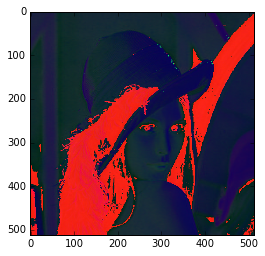

In [17]:
imshow(img_new)